## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 13.28 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Part 1: load the data, clean variables (Price, Beds, Number of Reviews, Review Scores Rating)
df = pd.read_csv("/content/kmc/data/airbnb_hw.csv")
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [4]:
df['Price'].unique() # there are commas and these are strings, need to fix this
new_df = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
new_df

,Price,Beds,Number Of Reviews,Review Scores Rating
0,145,1.0,0,NaN
1,37,1.0,1,NaN
2,28,1.0,1,NaN
3,199,3.0,0,NaN
4,549,3.0,39,96.0
...,...,...,...,...
30473,300,5.0,0,NaN
30474,125,2.0,0,NaN
30475,80,1.0,0,NaN
30476,35,1.0,0,NaN


In [5]:
# clean Price:
new_df['Price'] = new_df['Price'].replace(',','')
new_df['Price'] = pd.to_numeric(new_df['Price'],errors='coerce')

new_df['Price'].unique()

array([145.,  37.,  28., 199., 549., 149., 250.,  90., 270., 290., 170.,
        59.,  49.,  68., 285.,  75., 100., 150., 700., 125., 175.,  40.,
        89.,  95.,  99., 499., 120.,  79., 110., 180., 143., 230., 350.,
       135.,  85.,  60.,  70.,  55.,  44., 200., 165., 115.,  74.,  84.,
       129.,  50., 185.,  80., 190., 140.,  45.,  65., 225., 600., 109.,
        nan,  73., 240.,  72., 105., 155., 160.,  42., 132., 117., 295.,
       280., 159., 107.,  69., 239., 220., 399., 130., 375., 585., 275.,
       139., 260.,  35., 133., 300., 289., 179.,  98., 195.,  29.,  27.,
        39., 249., 192., 142., 169., 131., 138., 113., 122., 329., 101.,
       475., 238., 272., 308., 126., 235., 315., 248., 128.,  56., 207.,
       450., 215., 210., 385., 445., 136., 247., 118.,  77.,  76.,  92.,
       198., 205., 299., 222., 245., 104., 153., 349., 114., 320., 292.,
       226., 420., 500., 325., 307.,  78., 265., 108., 123., 189.,  32.,
        58.,  86., 219., 800., 335.,  63., 229., 42

In [6]:
# Clean Beds
new_df['Beds'] = new_df['Beds'].fillna(1) # take care of nas
new_df['Beds'].describe()

count    30478.000000
mean         1.528611
std          1.014327
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64

In [7]:
# Clean Number Of Reviews
new_df['Number Of Reviews'].unique() # already clean


array([  0,   1,  39,   4,   9,  80,  95,  23,  14, 120,  81,  17,  32,
        52,   3, 171,  16,  19,   2,  28,  62,   6,   5,  12,  40,  47,
        13,  35,  34,  68,  42,   7,  41,  15,  21,   8,  10,  29, 112,
        25, 132,  51, 156,  30,  98,  24,  74,  20, 188, 221,  57,  11,
       242,  67, 118,  60, 136, 119,  79, 106,  43,  91, 105,  96, 141,
       146,  63,  58,  18, 150,  38,  55,  89,  46,  77,  48,  36,  69,
        26,  73,  53, 165,  92,  87, 108, 109,  50, 127,  88,  83, 184,
       179,  22,  31,  82,  27, 123, 247, 190, 257, 217,  85, 103, 157,
       102,  56, 125, 115,  49,  97,  54,  65,  90,  44,  33, 100,  37,
       107, 114, 116,  61, 104,  71,  75, 145,  84,  93, 110, 172, 148,
       131, 154,  86,  64,  76, 129,  45, 180, 140,  78, 200, 175, 189,
       170, 187,  72, 137,  99, 101,  59,  94, 124, 223, 173, 151, 142,
       163, 121, 256, 248, 149, 128, 133,  66, 117, 176, 111,  70, 183,
       218, 192, 206, 161, 216, 191, 213, 178, 122, 153, 177, 16

In [13]:
# Clean Review Scores Rating
new_df['Review Scores Rating'].unique()
new_df = new_df.dropna()

new_df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,150.827814,1.548860,16.521127,91.986699
std,100.263647,1.012773,24.327880,8.847351
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,3.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


In [14]:
# Part 2: maxmin normalize

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df2 = new_df.apply(maxmin)
df2

,Price,Beds,Number Of Reviews,Review Scores Rating
4,0.544995,0.1875,0.148438,0.950
5,0.140546,0.0625,0.011719,1.000
6,0.242669,0.0625,0.031250,1.000
7,0.080890,0.0625,0.308594,0.925
8,0.262892,0.1250,0.367188,0.875
...,...,...,...,...
30332,0.080890,0.0625,0.000000,1.000
30347,0.055612,0.0625,0.000000,0.750
30378,0.045501,0.0625,0.000000,1.000
30404,0.050556,0.0625,0.000000,1.000


In [16]:
# Part 3: sklearn KMean clustering, k=6
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(df2)
df2['cluster'] = model.labels_
df2.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22104.000000,22104.000000,22104.000000,22104.000000,22104.000000
mean,0.142394,0.096804,0.060629,0.899834,1.386627
std,0.101379,0.063298,0.095031,0.110592,1.259123
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075834,0.062500,0.007812,0.862500,1.000000
50%,0.116279,0.062500,0.023438,0.925000,1.000000
75%,0.182002,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000


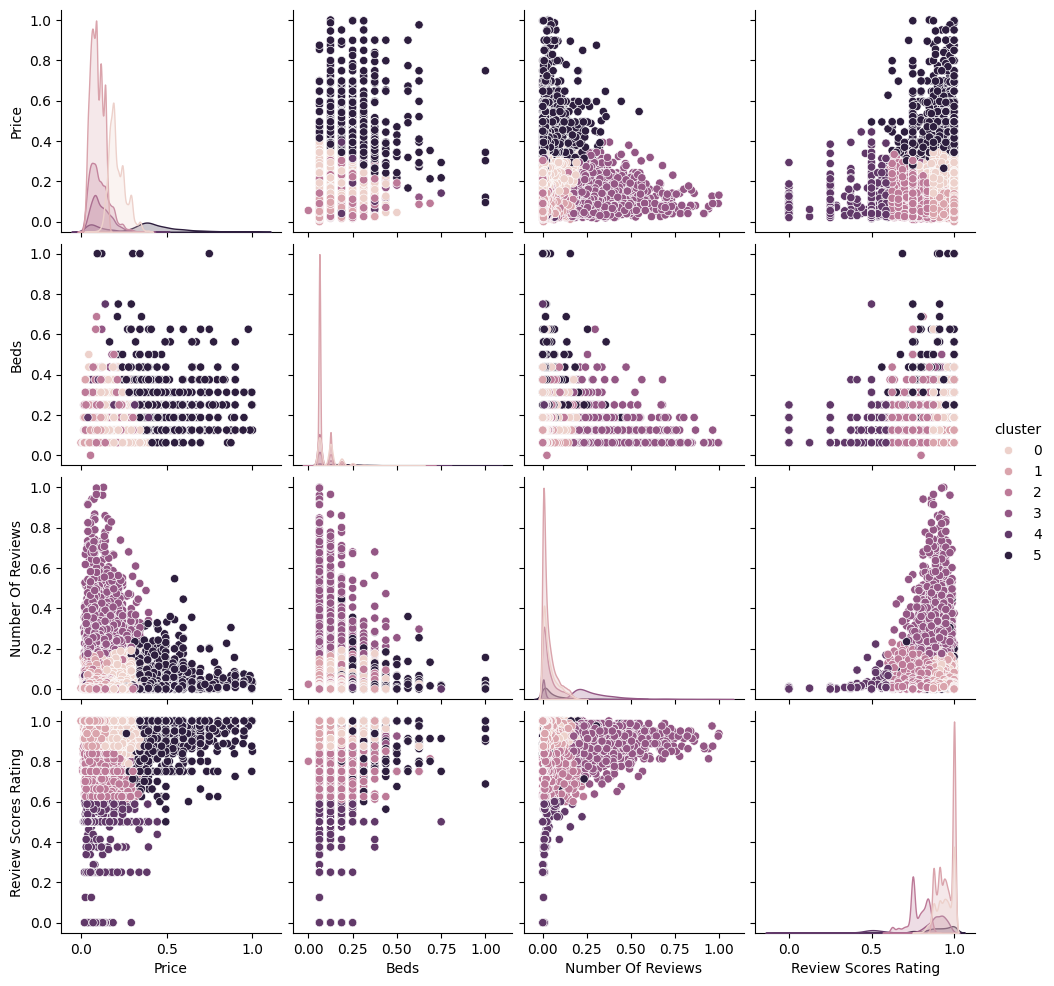

In [18]:
# Part 4: pairplot in sns

sns.pairplot(data=df2, hue='cluster')

In [19]:
# Part 5:

new_df['cluster'] = model.labels_
new_df.loc[:, ['Price', 'cluster']].groupby('cluster').describe()

<ipython-input-19-ee870a2556f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = model.labels_


Price                                                           
          count        mean         std    min    25%    50%    75%    max
cluster                                                                   
0        5277.0  217.682395   49.399694   55.0  180.0  200.0  250.0  400.0
1        9094.0   99.165274   33.595465   10.0   72.0   98.0  125.0  172.0
2        4153.0  117.369372   56.229324   20.0   75.0  103.0  150.0  350.0
3        2093.0  126.729097   58.791955   27.0   85.0  115.0  160.0  400.0
4         464.0  118.530172   80.921309   25.0   63.0   90.5  150.0  450.0
5        1023.0  465.006843  141.571405  104.0  375.0  425.0  522.0  999.0

Cluster 5 by far has the highest mean rental price, and it also has the highest min and max prices. Cluster 0 also has a relatively high rental price but has a max rental price less than or equal to both the max of clusters 3 and 4 which have lower mean rental prices. Cluster 1 has a low rental price relative to the other clusters. 4 of the 6 clusters have average rental prices around 100 (approximate range from 99 to 127).

Text(0.5, 1.0, 'Scree Plot')

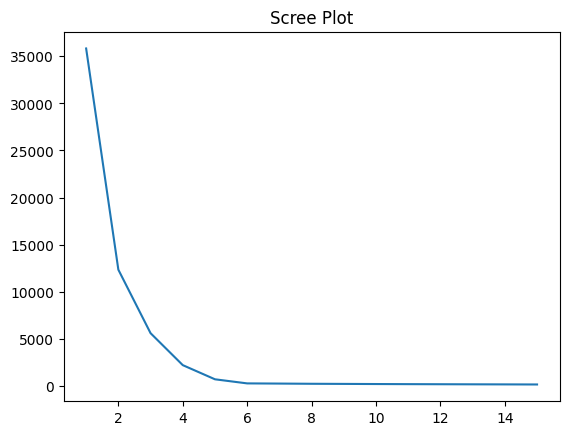

In [20]:
# Part 6:

# needed help from solutions for this part
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df2) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

Price                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0        14371.0  0.134160  0.070592  0.000000  0.075834  0.121335  0.182002   
1         6246.0  0.111735  0.057904  0.010111  0.065723  0.101112  0.141557   
2         1487.0  0.350751  0.206259  0.015167  0.166835  0.374115  0.470172   

                   
              max  
cluster            
0        0.394338  
1        0.394338  
2        1.000000

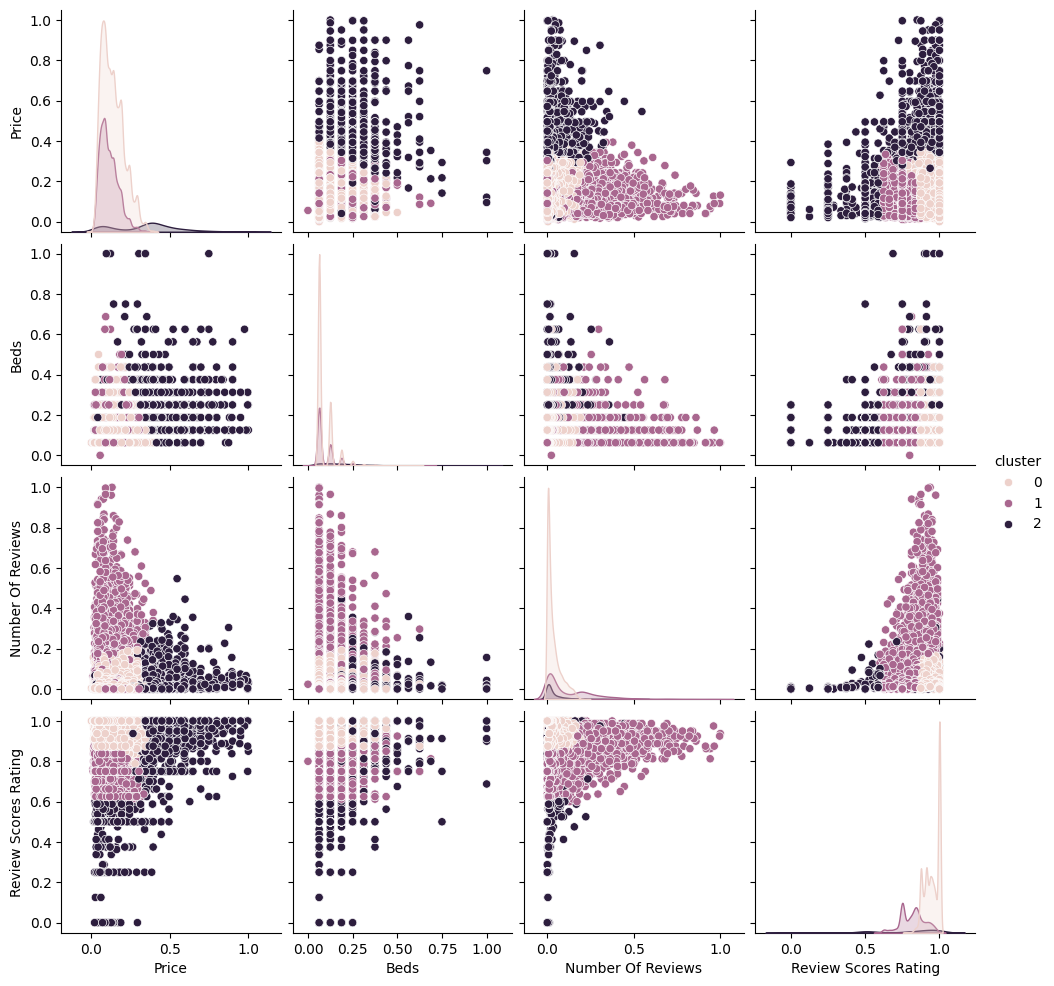

In [22]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(df2) # Fit the emodel
df2['cluster'] = model.labels_

sns.pairplot(data=df2,hue='cluster')

df2['cluster'] = model.labels_
df2.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Numbers don't look quite right.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [23]:
# Part 1:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

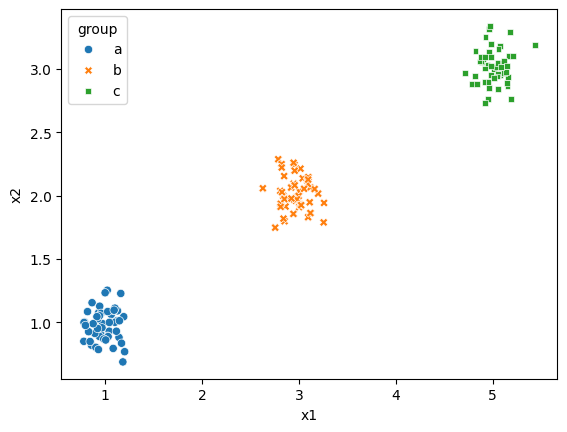

In [24]:
# Part 2: scatter plots

sns.scatterplot(data = df0_125, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

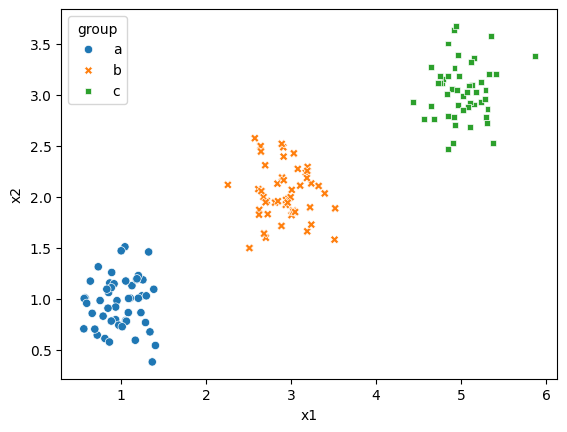

In [25]:
sns.scatterplot(data = df0_25, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

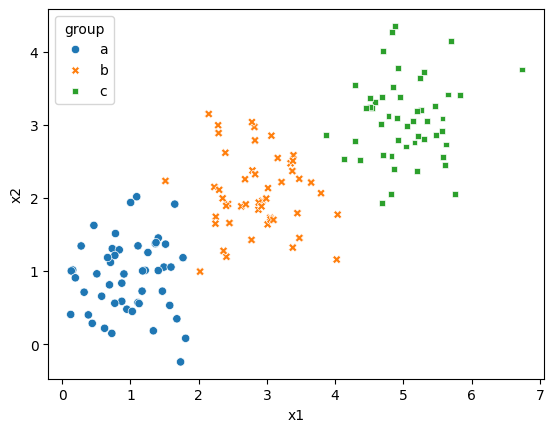

In [26]:
sns.scatterplot(data = df0_5, x = 'x1', y='x2', hue='group', style='group')

<Axes: xlabel='x1', ylabel='x2'>

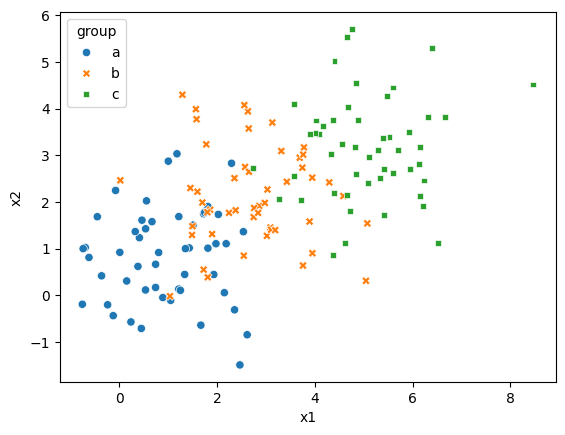

In [27]:
sns.scatterplot(data = df1_0, x = 'x1', y='x2', hue='group', style='group')


<Axes: xlabel='x1', ylabel='x2'>

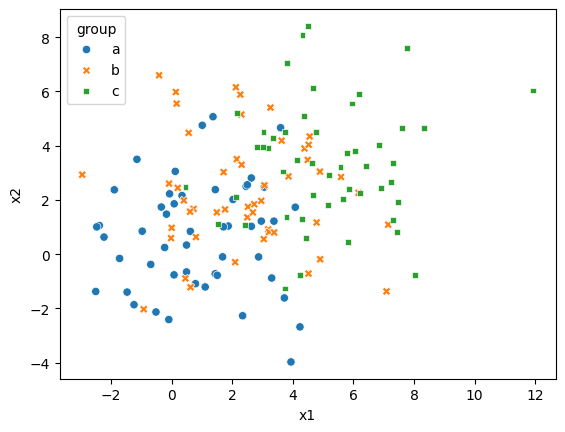

In [28]:
sns.scatterplot(data = df2_0, x = 'x1', y='x2', hue='group', style='group')

As noise increases the clusters become less defined and more spread out.

In [29]:
# Part 3: scree plots
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

# needed help used function from solution:
def scree(data):
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

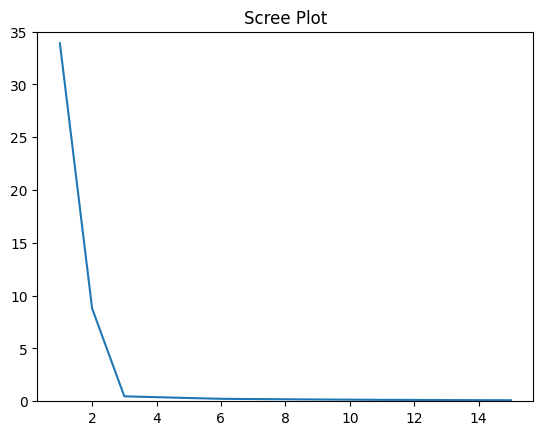

In [34]:
# 0.125
scree(data = df0_125)

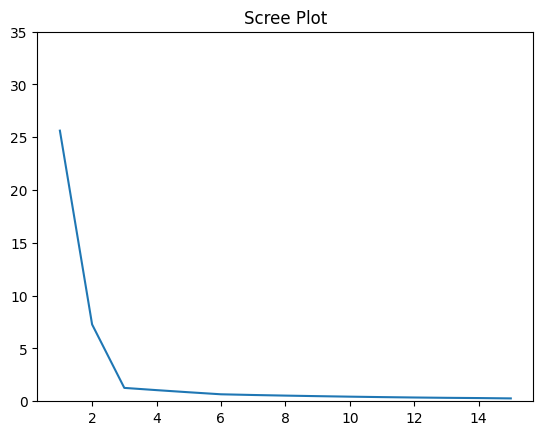

In [35]:
# 0.25
scree(data = df0_25)

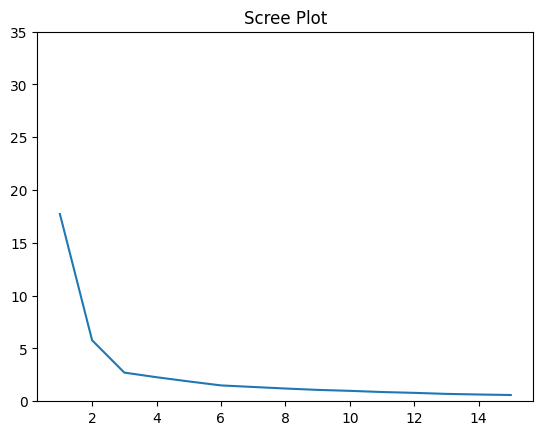

In [36]:
# 0.5
scree(data = df0_5 )

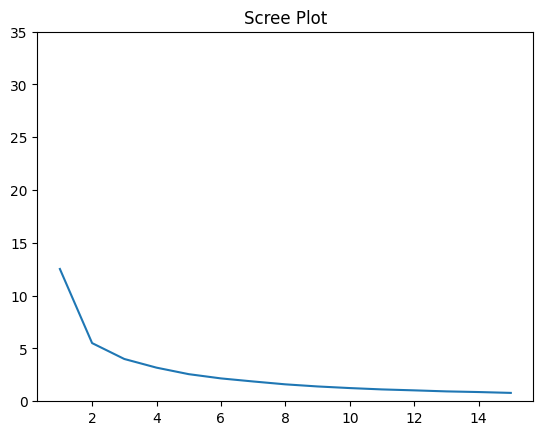

In [37]:
# 1.0
scree(data = df1_0)

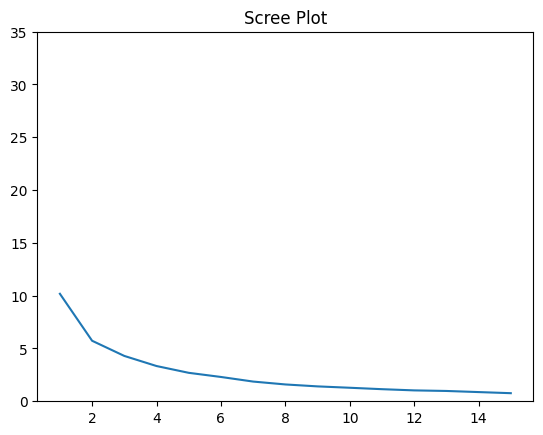

In [38]:
# 2.0
scree(data = df2_0)

The elbow stays pretty constant at around 3 until the graphs for 1.0 and 2.0 where the elbow either decreases or becomes ambiguous to me.

In [39]:
# Part 4: elbow intution

Going back to the clusters, as the clusters become less defined the elbow (as seen above) will also become less defined. We can see with the first three plots (noise of 0.125, 0.25, and 0.5) that there is a distinct elbow in the graphs, but with less clustering, the curves are flatter (noise of 1.0 and 2.0)

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?